In [27]:
import numpy as np
from matplotlib import pyplot as plt
import random
import pandas as pd

In [4]:
# pseudo code
'''
[1] random sampling - size n

[2-1] define whether in or out of circle (r = 1)
[2-2] calculate area of circle

[3] visualization & calculate discrepancy with pi
'''

def monte_carlo_pi_calculation(N):
  samples = []
  for i in range(N):
    x = random.random()
    y = random.random()
    samples.append((x,y))
  samples = np.array(samples)
  #print(samples)

  # random number generation function in numpy
  # samples = np.random.random([N,2]) <-- N number of 2D random variables

  distance = []
  for i in range(N):
    x = samples[i][0]
    y = samples[i][1]

    dist = x**2 + y**2
    distance.append(dist)
    #print (x,y)
  #print(distance)
  distance = np.array(distance)
  # distance = np.sum(samples**2.0, axis = 1)


  in_out = distance <= 1.0
  #print(in_out)

  pi = (np.sum(in_out)*4) / N
  diff = abs(np.pi - pi)
  print (pi, diff)

  #visulaize
  plt.figure(figsize = (5,5))
  cx = np.cos(np.linspace(0, np.pi/2, 1000))
  cy = np.sin(np.linspace(0, np.pi/2, 1000))
  plt.plot(cx, cy,color = 'black', lw = 2)
  
  # visulaize(sampled points)
  '''
  for i in range(N):
    if in_out[i]:
      colors.append('red')
    else :
      colors.append('blue')
  '''
  '''
  #pythonic
  colors = list(map(lambda x: 'red' if x else 'blue', in_out))
  '''
  colors = list(map(lambda x: 'red' if x else 'blue', in_out))
  plt.scatter(samples[:,0], samples[:,1], color = colors, s = 5, label = 'Result: {}\nDiff: {}'.format(pi, diff))
  plt.legend(loc = 'lower right')


  plt.show()

3.6 0.458407346410207


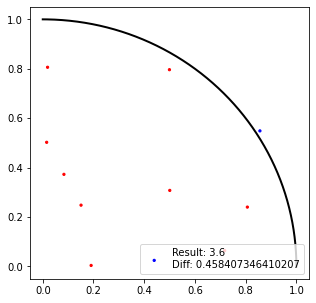

3.108 0.03359265358979302


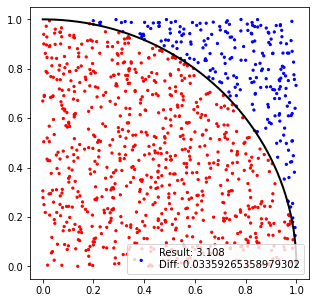

3.1468 0.0052073464102067035


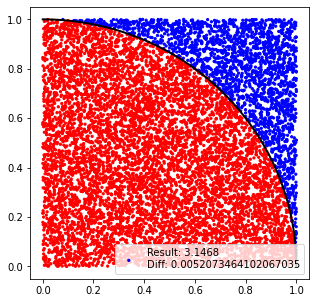

3.145 0.0034073464102069018


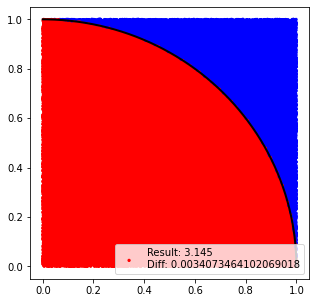

In [6]:
for num_samples in [10, 1000, 10000, 100000]:
  monte_carlo_pi_calculation(num_samples)


In [16]:
def simulation(num_stock):
  '''
    args
      num_stock (int) = number of pairs of socks
    return
      profit (int) = profit earned acoording to givin number of socks
  '''
  K = 1000 #price per pair of socks
  mu = 557 # mean number of customers per day
  sigma = 183 # standard deviation of distribution
  P1 = 0.05 # probability of buying socks when in stock
  P2 = 0.025 # probability of buying socks online when socks not in stock
  Q = 300 # cost of having 1 pair of socks in stock

  revenue = 0
  cost = num_stock * Q

  num_customers = int (np.random.normal(mu, sigma, 1))
  #print(num_customers)

  for i in range (num_customers):
    if num_stock > 0:
      if random.random() < P1 :
        num_stock -= 1
        revenue += K
    else:
      if random.random() < P2 :
        revenue += K

  profit  = revenue - cost
  return profit
      

In [24]:
num_trial_max = 200
num_stock_max = 150
final_result = []
for i in range (num_trial_max):
  result = []
  for num_stock in range (num_stock_max):
    profit = simulation(num_stock)
    result.append(profit)
  final_result.append(result)

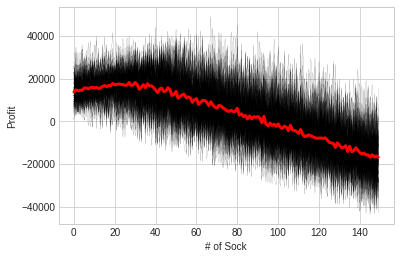

optinmal number of socks to have in stock : 27, expected profit : 18160.0


In [33]:
#visualization
plt.style.use('seaborn-whitegrid')
output = pd.DataFrame(final_result)
#print(output)

ax = output.T.plot(lw = 0.1, color = 'black', legend = False)
ax.set_xlabel('# of Sock')
ax.set_ylabel('Profit')

output.mean().plot(lw = 3, color = 'red', legend = False)
plt.show()

data = output.mean()
max_profit = data.max()
optimal_num_stocks = data.argmax()
print('optinmal number of socks to have in stock : {}, expected profit : {}'.format(optimal_num_stocks, max_profit))